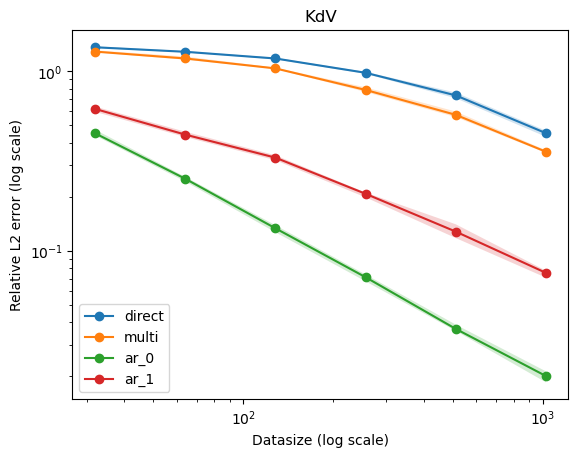

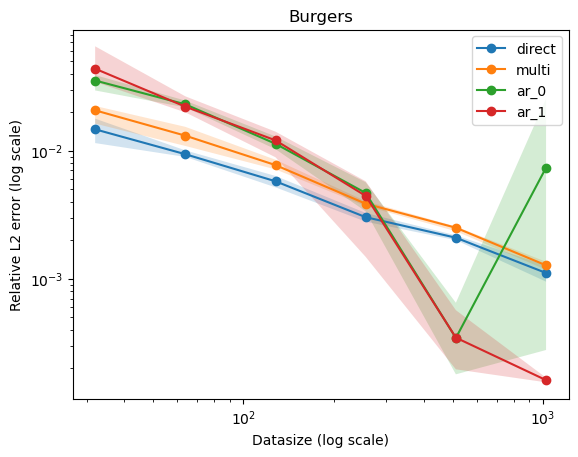

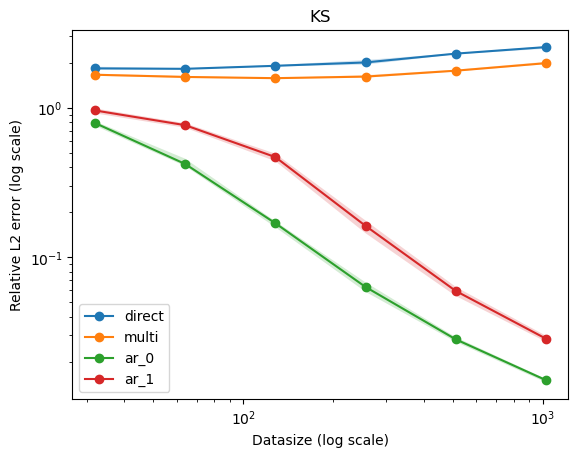

In [2]:
import torch


import os
import re


# Find file that starts with 'results_Burgers_ar_0' in the folder 'results'


def find_files(folder, pattern):
    files = os.listdir(folder)
    return [f for f in files if re.match(pattern, f)]



from matplotlib import pyplot as plt

for equation in ['KdV', 'Burgers', 'KS']:

    plt.figure()

    for experiment in ['direct', 'multi', 'ar_0', 'ar_1']:
        folder = 'results'
        pattern = f'results_{equation}_{experiment}.*'
        files = find_files(folder, pattern)
        file = files[-1]

        results = torch.load(f'{folder}/{file}')
        datasize_list = results[0]['datasize']
        results_list = [results[i]['rel_l2'] for i in range(5)]
        results_list = torch.tensor(results_list)
        mean = results_list.mean(dim=0)
        std = results_list.std(dim=0)
        max = results_list.max(dim=0).values
        min = results_list.min(dim=0).values
        plt.plot(datasize_list, mean, 'o-', label=f'{experiment}')
        plt.fill_between(datasize_list, max, min, alpha=0.2)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Relative L2 error (log scale)')
        plt.title(f'{equation}')
        plt.legend()


In [17]:
names = [
    'random',
    'direct_variance',
    'direct_lcmd',
    # 'trajectory_random',
    'trajectory_variance',
    'trajectory_lcmd',
    ]

results = [
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.24081262946128845]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25034278631210327, 0.18340399861335754]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13490615785121918, 0.11522512137889862]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07047665119171143, 0.06145544722676277]}, 512: {'datasize': [512, 544], 'rel_l2': [0.037751056253910065, 0.034659214317798615]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.22482164204120636]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12450313568115234]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.07847028225660324]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.044163573533296585]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.02709384635090828]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.20584812760353088]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12221819162368774]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.0792493000626564]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.04490712285041809]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.027069905772805214]}},
    # {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.24081262946128845]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25034278631210327, 0.18340399861335754]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13490615785121918, 0.11522512137889862]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07047665119171143, 0.06145544722676277]}, 512: {'datasize': [512, 544], 'rel_l2': [0.037751056253910065, 0.034659214317798615]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.21282966434955597]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12606796622276306]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.07901769876480103]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.04514498636126518]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.027069905772805214]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.19134661555290222]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12105043232440948]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.07873691618442535]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.044655561447143555]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.027054231613874435]}},
]



In [15]:
mask = [False, True, True, True, True]
names = [name for name, m in zip(names, mask) if m]
results = [result for result, m in zip(results, mask) if m]

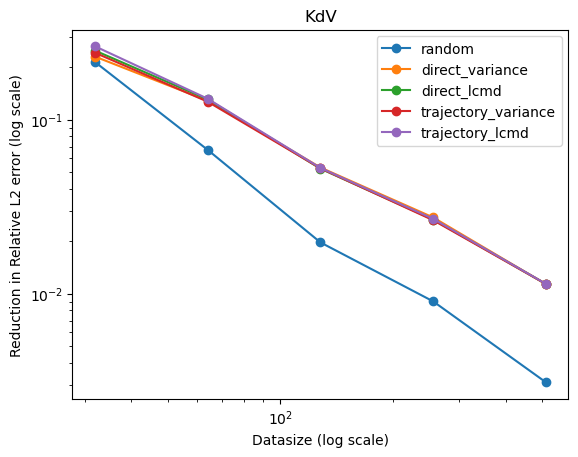

In [20]:

from matplotlib import pyplot as plt

for equation in ['KdV']:

    plt.figure()

    for i in range(len(results)):
        datasize_list = list(results[i].keys())
        initial_rel_l2 = [results[i][datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[i][datasize]['rel_l2'][1] for datasize in datasize_list]
        improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        plt.plot(datasize_list, improvement, 'o-', label=f'{names[i]}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Reduction in Relative L2 error (log scale)')
        plt.title(f'{equation}')
        plt.legend()

In [1]:
results = [
    {32: {'datasize': [32, 64], 'rel_l2': [0.4559093117713928, 0.2209615707397461], 'rel_l2_trajectory': [0.27587181329727173, 0.12839041650295258]}, 64: {'datasize': [64, 96], 'rel_l2': [0.2473108321428299, 0.12431727349758148], 'rel_l2_trajectory': [0.14593110978603363, 0.0711544007062912]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13617558777332306, 0.07847975939512253], 'rel_l2_trajectory': [0.07850988954305649, 0.043993718922138214]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07027699798345566, 0.04497718811035156], 'rel_l2_trajectory': [0.03982493281364441, 0.02515002153813839]}, 512: {'datasize': [512, 544], 'rel_l2': [0.038071028888225555, 0.027154479175806046], 'rel_l2_trajectory': [0.021400654688477516, 0.015349963679909706]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.17861855030059814], 'rel_l2_trajectory': [0.2752259373664856, 0.10361836850643158]}, 64: {'datasize': [64, 96], 'rel_l2': [0.2497648298740387, 0.12284811586141586], 'rel_l2_trajectory': [0.14743521809577942, 0.07069758325815201]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13703854382038116, 0.07998895645141602], 'rel_l2_trajectory': [0.07890178263187408, 0.04510485753417015]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07161663472652435, 0.04670330137014389], 'rel_l2_trajectory': [0.0405750647187233, 0.02637697197496891]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03777207061648369, 0.027779361233115196], 'rel_l2_trajectory': [0.02126902900636196, 0.015721525996923447]}},
]

names = [
    'direct_lcmd_combination',
    'trajectory_lcmd_combination',
]



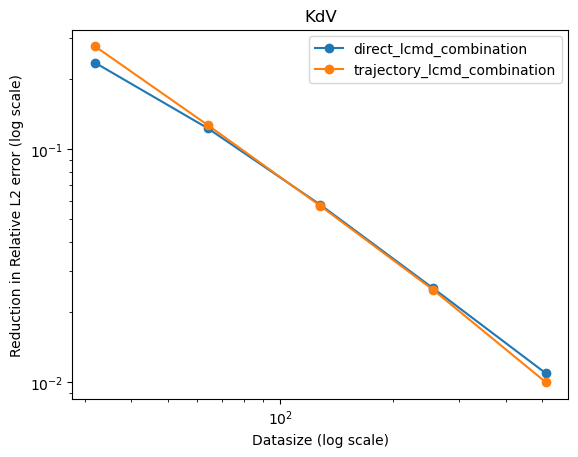

In [2]:

from matplotlib import pyplot as plt

for equation in ['KdV']:

    plt.figure()

    for i in range(len(results)):
        datasize_list = list(results[i].keys())
        initial_rel_l2 = [results[i][datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[i][datasize]['rel_l2'][1] for datasize in datasize_list]
        improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        plt.plot(datasize_list, improvement, 'o-', label=f'{names[i]}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Reduction in Relative L2 error (log scale)')
        plt.title(f'{equation}')
        plt.legend()

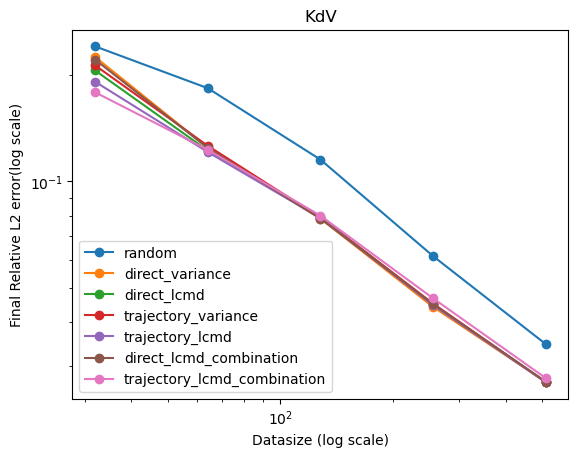

In [21]:
names = [
    'random',
    'direct_variance',
    'direct_lcmd',
    # 'trajectory_random',
    'trajectory_variance',
    'trajectory_lcmd',
    'direct_lcmd_combination',
    'trajectory_lcmd_combination',
    ]

results = [
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.24081262946128845]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25034278631210327, 0.18340399861335754]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13490615785121918, 0.11522512137889862]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07047665119171143, 0.06145544722676277]}, 512: {'datasize': [512, 544], 'rel_l2': [0.037751056253910065, 0.034659214317798615]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.22482164204120636]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12450313568115234]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.07847028225660324]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.044163573533296585]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.02709384635090828]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.20584812760353088]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12221819162368774]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.0792493000626564]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.04490712285041809]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.027069905772805214]}},
    # {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.24081262946128845]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25034278631210327, 0.18340399861335754]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13490615785121918, 0.11522512137889862]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07047665119171143, 0.06145544722676277]}, 512: {'datasize': [512, 544], 'rel_l2': [0.037751056253910065, 0.034659214317798615]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.21282966434955597]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12606796622276306]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.07901769876480103]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.04514498636126518]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.027069905772805214]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.19134661555290222]}, 64: {'datasize': [64, 96], 'rel_l2': [0.25274449586868286, 0.12105043232440948]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13147448003292084, 0.07873691618442535]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07155264914035797, 0.044655561447143555]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03842724487185478, 0.027054231613874435]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.4559093117713928, 0.2209615707397461], 'rel_l2_trajectory': [0.27587181329727173, 0.12839041650295258]}, 64: {'datasize': [64, 96], 'rel_l2': [0.2473108321428299, 0.12431727349758148], 'rel_l2_trajectory': [0.14593110978603363, 0.0711544007062912]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13617558777332306, 0.07847975939512253], 'rel_l2_trajectory': [0.07850988954305649, 0.043993718922138214]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07027699798345566, 0.04497718811035156], 'rel_l2_trajectory': [0.03982493281364441, 0.02515002153813839]}, 512: {'datasize': [512, 544], 'rel_l2': [0.038071028888225555, 0.027154479175806046], 'rel_l2_trajectory': [0.021400654688477516, 0.015349963679909706]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.45493069291114807, 0.17861855030059814], 'rel_l2_trajectory': [0.2752259373664856, 0.10361836850643158]}, 64: {'datasize': [64, 96], 'rel_l2': [0.2497648298740387, 0.12284811586141586], 'rel_l2_trajectory': [0.14743521809577942, 0.07069758325815201]}, 128: {'datasize': [128, 160], 'rel_l2': [0.13703854382038116, 0.07998895645141602], 'rel_l2_trajectory': [0.07890178263187408, 0.04510485753417015]}, 256: {'datasize': [256, 288], 'rel_l2': [0.07161663472652435, 0.04670330137014389], 'rel_l2_trajectory': [0.0405750647187233, 0.02637697197496891]}, 512: {'datasize': [512, 544], 'rel_l2': [0.03777207061648369, 0.027779361233115196], 'rel_l2_trajectory': [0.02126902900636196, 0.015721525996923447]}},
]



from matplotlib import pyplot as plt

for equation in ['KdV']:

    plt.figure()

    for i in range(len(results)):
        datasize_list = list(results[i].keys())
        initial_rel_l2 = [results[i][datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[i][datasize]['rel_l2'][1] for datasize in datasize_list]
        improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        # plt.plot(datasize_list, improvement, 'o-', label=f'{names[i]}')
        plt.plot(datasize_list, final_rel_l2, 'o-', label=f'{names[i]}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Final Relative L2 error(log scale)')
        plt.title(f'{equation}')
        plt.legend()

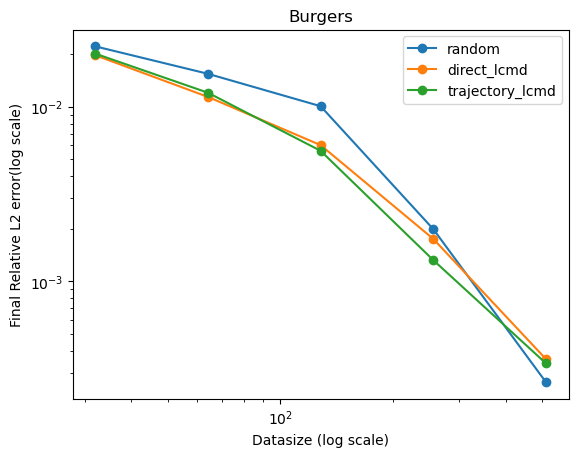

In [22]:
names = [
    'random',
    'direct_lcmd',
    'trajectory_lcmd',
    ]

results = [
    {32: {'datasize': [32, 64], 'rel_l2': [0.04028893634676933, 0.022201593965291977], 'rel_l2_trajectory': [0.029762420803308487, 0.01653395965695381]}, 64: {'datasize': [64, 96], 'rel_l2': [0.024651873856782913, 0.015454639680683613], 'rel_l2_trajectory': [0.017737004905939102, 0.011243067681789398]}, 128: {'datasize': [128, 160], 'rel_l2': [0.010982058942317963, 0.010076219215989113], 'rel_l2_trajectory': [0.007971743121743202, 0.007156987674534321]}, 256: {'datasize': [256, 288], 'rel_l2': [0.0027459082193672657, 0.0019879774190485477], 'rel_l2_trajectory': [0.0018010411877185106, 0.0012928744545206428]}, 512: {'datasize': [512, 544], 'rel_l2': [0.00023190765932668, 0.0002636011631693691], 'rel_l2_trajectory': [0.00016991204756777734, 0.0001954995095729828]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.03307517245411873, 0.019747501239180565], 'rel_l2_trajectory': [0.024153249338269234, 0.015182023867964745]}, 64: {'datasize': [64, 96], 'rel_l2': [0.026448648422956467, 0.011392960324883461], 'rel_l2_trajectory': [0.018970679491758347, 0.008644307032227516]}, 128: {'datasize': [128, 160], 'rel_l2': [0.011192535981535912, 0.0060272859409451485], 'rel_l2_trajectory': [0.00820445828139782, 0.004334339406341314]}, 256: {'datasize': [256, 288], 'rel_l2': [0.0032128028105944395, 0.0017479736125096679], 'rel_l2_trajectory': [0.002146753715351224, 0.001176886260509491]}, 512: {'datasize': [512, 544], 'rel_l2': [0.00028601480880752206, 0.0003575056907720864], 'rel_l2_trajectory': [0.00019862556655425578, 0.00025949341943487525]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.03225735202431679, 0.0201640035957098], 'rel_l2_trajectory': [0.024078186601400375, 0.01565655693411827]}, 64: {'datasize': [64, 96], 'rel_l2': [0.02300497516989708, 0.012039934284985065], 'rel_l2_trajectory': [0.01680373027920723, 0.009019915945827961]}, 128: {'datasize': [128, 160], 'rel_l2': [0.011056618764996529, 0.005593243055045605], 'rel_l2_trajectory': [0.008021761663258076, 0.004002629779279232]}, 256: {'datasize': [256, 288], 'rel_l2': [0.004288106225430965, 0.0013209499884396791], 'rel_l2_trajectory': [0.00291011156514287, 0.0008660100284032524]}, 512: {'datasize': [512, 544], 'rel_l2': [0.0005217368016019464, 0.0003380381385795772], 'rel_l2_trajectory': [0.0003418939304538071, 0.00023875475744716823]}},
]


from matplotlib import pyplot as plt

for equation in ['Burgers']:

    plt.figure()

    for i in range(len(results)):
        datasize_list = list(results[i].keys())
        initial_rel_l2 = [results[i][datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[i][datasize]['rel_l2'][1] for datasize in datasize_list]
        improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        # plt.plot(datasize_list, improvement, 'o-', label=f'{names[i]}')
        plt.plot(datasize_list, final_rel_l2, 'o-', label=f'{names[i]}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Final Relative L2 error(log scale)')
        plt.title(f'{equation}')
        plt.legend()

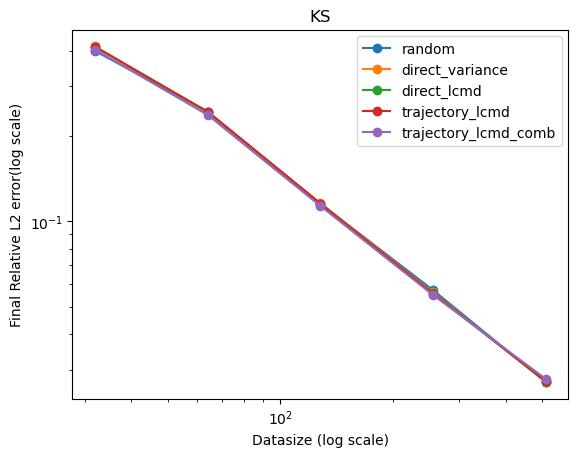

In [24]:
names = [
    'random',
    'direct_variance',
    'direct_lcmd',
    'trajectory_lcmd',
    'trajectory_lcmd_comb'
]

results = [
    {32: {'datasize': [32, 64], 'rel_l2': [0.8078557848930359, 0.3994104862213135], 'rel_l2_trajectory': [0.4512936472892761, 0.20424039661884308]}, 64: {'datasize': [64, 96], 'rel_l2': [0.41775527596473694, 0.24361762404441833], 'rel_l2_trajectory': [0.21367783844470978, 0.12053148448467255]}, 128: {'datasize': [128, 160], 'rel_l2': [0.1546059399843216, 0.11540935188531876], 'rel_l2_trajectory': [0.07508865743875504, 0.05548515170812607]}, 256: {'datasize': [256, 288], 'rel_l2': [0.0652356743812561, 0.05715031549334526], 'rel_l2_trajectory': [0.03106776997447014, 0.02712390385568142]}, 512: {'datasize': [512, 544], 'rel_l2': [0.029038649052381516, 0.027046125382184982], 'rel_l2_trajectory': [0.013622636906802654, 0.012780730612576008]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.8076395988464355, 0.4147069454193115], 'rel_l2_trajectory': [0.4510864317417145, 0.21180061995983124]}, 64: {'datasize': [64, 96], 'rel_l2': [0.4247637689113617, 0.2424207478761673], 'rel_l2_trajectory': [0.21827995777130127, 0.11990628391504288]}, 128: {'datasize': [128, 160], 'rel_l2': [0.15559139847755432, 0.11580882966518402], 'rel_l2_trajectory': [0.0755552276968956, 0.0556490421295166]}, 256: {'datasize': [256, 288], 'rel_l2': [0.06570456922054291, 0.056126080453395844], 'rel_l2_trajectory': [0.03134270757436752, 0.026615208014845848]}, 512: {'datasize': [512, 544], 'rel_l2': [0.028895055875182152, 0.027152691036462784], 'rel_l2_trajectory': [0.013635383918881416, 0.012758204713463783]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.8077734112739563, 0.4128188490867615], 'rel_l2_trajectory': [0.45120659470558167, 0.21070270240306854]}, 64: {'datasize': [64, 96], 'rel_l2': [0.42600828409194946, 0.2427968531847], 'rel_l2_trajectory': [0.21888336539268494, 0.1200660690665245]}, 128: {'datasize': [128, 160], 'rel_l2': [0.15528345108032227, 0.11530332267284393], 'rel_l2_trajectory': [0.07544757425785065, 0.05544286221265793]}, 256: {'datasize': [256, 288], 'rel_l2': [0.06607043743133545, 0.05580099672079086], 'rel_l2_trajectory': [0.03147862106561661, 0.026549125090241432]}, 512: {'datasize': [512, 544], 'rel_l2': [0.028957922011613846, 0.027154285460710526], 'rel_l2_trajectory': [0.013666157610714436, 0.012754907831549644]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.807654857635498, 0.4130088686943054], 'rel_l2_trajectory': [0.4511398673057556, 0.21030811965465546]}, 64: {'datasize': [64, 96], 'rel_l2': [0.42557698488235474, 0.24390888214111328], 'rel_l2_trajectory': [0.21868450939655304, 0.1205565556883812]}, 128: {'datasize': [128, 160], 'rel_l2': [0.15536542236804962, 0.11558570712804794], 'rel_l2_trajectory': [0.07552710920572281, 0.055646948516368866]}, 256: {'datasize': [256, 288], 'rel_l2': [0.06580420583486557, 0.05553383752703667], 'rel_l2_trajectory': [0.03139114007353783, 0.02642539143562317]}, 512: {'datasize': [512, 544], 'rel_l2': [0.02885000966489315, 0.02729126252233982], 'rel_l2_trajectory': [0.013617333956062794, 0.012812522239983082]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.7970476746559143, 0.4036698341369629], 'rel_l2_trajectory': [0.4438386559486389, 0.20456039905548096]}, 64: {'datasize': [64, 96], 'rel_l2': [0.4093472957611084, 0.23737852275371552], 'rel_l2_trajectory': [0.2095966786146164, 0.11693724244832993]}, 128: {'datasize': [128, 160], 'rel_l2': [0.15914210677146912, 0.11327961832284927], 'rel_l2_trajectory': [0.07740022987127304, 0.05463340878486633]}, 256: {'datasize': [256, 288], 'rel_l2': [0.06522933393716812, 0.05494754761457443], 'rel_l2_trajectory': [0.031169772148132324, 0.026075508445501328]}, 512: {'datasize': [512, 544], 'rel_l2': [0.029899101704359055, 0.02777082845568657], 'rel_l2_trajectory': [0.01410306990146637, 0.013080453500151634]}},
]


from matplotlib import pyplot as plt

for equation in ['KS']:

    plt.figure()

    for i in range(len(results)):
        datasize_list = list(results[i].keys())
        initial_rel_l2 = [results[i][datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[i][datasize]['rel_l2'][1] for datasize in datasize_list]
        improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        # plt.plot(datasize_list, improvement, 'o-', label=f'{names[i]}')
        plt.plot(datasize_list, final_rel_l2, 'o-', label=f'{names[i]}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Final Relative L2 error(log scale)')
        plt.title(f'{equation}')
        plt.legend()

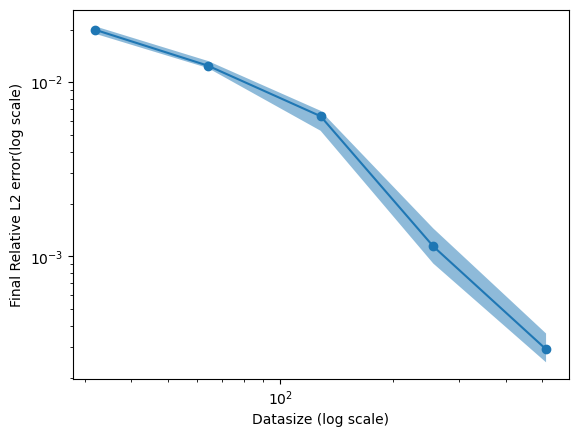

In [15]:
import os
import re
import torch
from matplotlib import pyplot as plt

def find_files(folder, pattern):
    files = os.listdir(folder)
    return [f for f in files if re.match(pattern, f)]




# files = find_files('results', 'results_al*')
files = find_files('results', 'results_al_comb_Burgers_trajectory_lcmd_20240811-022858.pt')

files = ['results/'+f for f in files]

plt.figure()
for file in files:
    results = torch.load(file)
    final_rel_l2_list = []
    for seed in range(5):
        datasize_list = list(results[seed].keys())
        # initial_rel_l2 = [results[datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[seed][datasize]['rel_l2'][1] for datasize in datasize_list]
        # improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        final_rel_l2_list.append(final_rel_l2)
    final_rel_l2 = torch.tensor(final_rel_l2_list)
    final_rel_l2_mean = final_rel_l2.mean(dim=0)
    final_rel_l2_max = final_rel_l2.max(dim=0).values
    final_rel_l2_min = final_rel_l2.min(dim=0).values
    plt.plot(datasize_list, final_rel_l2_mean, 'o-', label=f'{file}')
    plt.fill_between(datasize_list, final_rel_l2_min, final_rel_l2_max, alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Datasize (log scale)')
    plt.ylabel('Final Relative L2 error(log scale)')
# plt.legend()

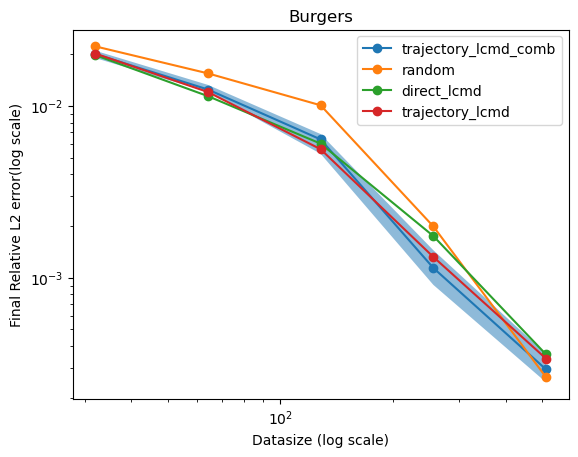

In [19]:
import os
import re
import torch
from matplotlib import pyplot as plt

def find_files(folder, pattern):
    files = os.listdir(folder)
    return [f for f in files if re.match(pattern, f)]




# files = find_files('results', 'results_al*')
files = find_files('results', 'results_al_comb_Burgers_trajectory_lcmd_20240811-022858.pt')

files = ['results/'+f for f in files]

plt.figure()
for file in files:
    results = torch.load(file)
    final_rel_l2_list = []
    for seed in range(5):
        datasize_list = list(results[seed].keys())
        # initial_rel_l2 = [results[datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[seed][datasize]['rel_l2'][1] for datasize in datasize_list]
        # improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        final_rel_l2_list.append(final_rel_l2)
    final_rel_l2 = torch.tensor(final_rel_l2_list)
    final_rel_l2_mean = final_rel_l2.mean(dim=0)
    final_rel_l2_max = final_rel_l2.max(dim=0).values
    final_rel_l2_min = final_rel_l2.min(dim=0).values
    plt.plot(datasize_list, final_rel_l2_mean, 'o-', label='trajectory_lcmd_comb')
    plt.fill_between(datasize_list, final_rel_l2_min, final_rel_l2_max, alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Datasize (log scale)')
    plt.ylabel('Final Relative L2 error(log scale)')
# plt.legend()

names = [
    'random',
    'direct_lcmd',
    'trajectory_lcmd',
    ]

results = [
    {32: {'datasize': [32, 64], 'rel_l2': [0.04028893634676933, 0.022201593965291977], 'rel_l2_trajectory': [0.029762420803308487, 0.01653395965695381]}, 64: {'datasize': [64, 96], 'rel_l2': [0.024651873856782913, 0.015454639680683613], 'rel_l2_trajectory': [0.017737004905939102, 0.011243067681789398]}, 128: {'datasize': [128, 160], 'rel_l2': [0.010982058942317963, 0.010076219215989113], 'rel_l2_trajectory': [0.007971743121743202, 0.007156987674534321]}, 256: {'datasize': [256, 288], 'rel_l2': [0.0027459082193672657, 0.0019879774190485477], 'rel_l2_trajectory': [0.0018010411877185106, 0.0012928744545206428]}, 512: {'datasize': [512, 544], 'rel_l2': [0.00023190765932668, 0.0002636011631693691], 'rel_l2_trajectory': [0.00016991204756777734, 0.0001954995095729828]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.03307517245411873, 0.019747501239180565], 'rel_l2_trajectory': [0.024153249338269234, 0.015182023867964745]}, 64: {'datasize': [64, 96], 'rel_l2': [0.026448648422956467, 0.011392960324883461], 'rel_l2_trajectory': [0.018970679491758347, 0.008644307032227516]}, 128: {'datasize': [128, 160], 'rel_l2': [0.011192535981535912, 0.0060272859409451485], 'rel_l2_trajectory': [0.00820445828139782, 0.004334339406341314]}, 256: {'datasize': [256, 288], 'rel_l2': [0.0032128028105944395, 0.0017479736125096679], 'rel_l2_trajectory': [0.002146753715351224, 0.001176886260509491]}, 512: {'datasize': [512, 544], 'rel_l2': [0.00028601480880752206, 0.0003575056907720864], 'rel_l2_trajectory': [0.00019862556655425578, 0.00025949341943487525]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.03225735202431679, 0.0201640035957098], 'rel_l2_trajectory': [0.024078186601400375, 0.01565655693411827]}, 64: {'datasize': [64, 96], 'rel_l2': [0.02300497516989708, 0.012039934284985065], 'rel_l2_trajectory': [0.01680373027920723, 0.009019915945827961]}, 128: {'datasize': [128, 160], 'rel_l2': [0.011056618764996529, 0.005593243055045605], 'rel_l2_trajectory': [0.008021761663258076, 0.004002629779279232]}, 256: {'datasize': [256, 288], 'rel_l2': [0.004288106225430965, 0.0013209499884396791], 'rel_l2_trajectory': [0.00291011156514287, 0.0008660100284032524]}, 512: {'datasize': [512, 544], 'rel_l2': [0.0005217368016019464, 0.0003380381385795772], 'rel_l2_trajectory': [0.0003418939304538071, 0.00023875475744716823]}},
]


from matplotlib import pyplot as plt

for equation in ['Burgers']:

    for i in range(len(results)):
        datasize_list = list(results[i].keys())
        initial_rel_l2 = [results[i][datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[i][datasize]['rel_l2'][1] for datasize in datasize_list]
        improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        # plt.plot(datasize_list, improvement, 'o-', label=f'{names[i]}')
        plt.plot(datasize_list, final_rel_l2, 'o-', label=f'{names[i]}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Final Relative L2 error(log scale)')
        plt.title(f'{equation}')
        plt.legend()

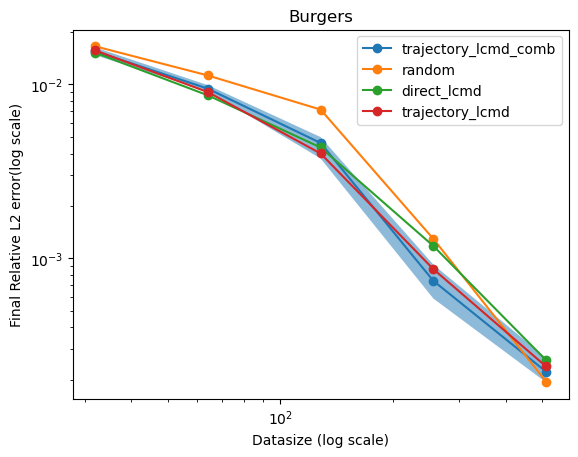

In [15]:
import os
import re
import torch
from matplotlib import pyplot as plt

def find_files(folder, pattern):
    files = os.listdir(folder)
    return [f for f in files if re.match(pattern, f)]




# files = find_files('results', 'results_al*')
files = find_files('results', 'results_al_comb_Burgers_trajectory_lcmd_20240811-022858.pt')

files = ['results/'+f for f in files]

plt.figure()
for file in files:
    results = torch.load(file)
    final_rel_l2_list = []
    for seed in range(5):
        datasize_list = list(results[seed].keys())
        # initial_rel_l2 = [results[datasize]['rel_l2'][0] for datasize in datasize_list]
        final_rel_l2 = [results[seed][datasize]['rel_l2_trajectory'][1] for datasize in datasize_list]
        # improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        final_rel_l2_list.append(final_rel_l2)
    final_rel_l2 = torch.tensor(final_rel_l2_list)
    final_rel_l2_mean = final_rel_l2.mean(dim=0)
    final_rel_l2_max = final_rel_l2.max(dim=0).values
    final_rel_l2_min = final_rel_l2.min(dim=0).values
    plt.plot(datasize_list, final_rel_l2_mean, 'o-', label='trajectory_lcmd_comb')
    plt.fill_between(datasize_list, final_rel_l2_min, final_rel_l2_max, alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Datasize (log scale)')
    plt.ylabel('Final Relative L2 error(log scale)')
# plt.legend()

names = [
    'random',
    'direct_lcmd',
    'trajectory_lcmd',
    ]

results = [
    {32: {'datasize': [32, 64], 'rel_l2': [0.04028893634676933, 0.022201593965291977], 'rel_l2_trajectory': [0.029762420803308487, 0.01653395965695381]}, 64: {'datasize': [64, 96], 'rel_l2': [0.024651873856782913, 0.015454639680683613], 'rel_l2_trajectory': [0.017737004905939102, 0.011243067681789398]}, 128: {'datasize': [128, 160], 'rel_l2': [0.010982058942317963, 0.010076219215989113], 'rel_l2_trajectory': [0.007971743121743202, 0.007156987674534321]}, 256: {'datasize': [256, 288], 'rel_l2': [0.0027459082193672657, 0.0019879774190485477], 'rel_l2_trajectory': [0.0018010411877185106, 0.0012928744545206428]}, 512: {'datasize': [512, 544], 'rel_l2': [0.00023190765932668, 0.0002636011631693691], 'rel_l2_trajectory': [0.00016991204756777734, 0.0001954995095729828]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.03307517245411873, 0.019747501239180565], 'rel_l2_trajectory': [0.024153249338269234, 0.015182023867964745]}, 64: {'datasize': [64, 96], 'rel_l2': [0.026448648422956467, 0.011392960324883461], 'rel_l2_trajectory': [0.018970679491758347, 0.008644307032227516]}, 128: {'datasize': [128, 160], 'rel_l2': [0.011192535981535912, 0.0060272859409451485], 'rel_l2_trajectory': [0.00820445828139782, 0.004334339406341314]}, 256: {'datasize': [256, 288], 'rel_l2': [0.0032128028105944395, 0.0017479736125096679], 'rel_l2_trajectory': [0.002146753715351224, 0.001176886260509491]}, 512: {'datasize': [512, 544], 'rel_l2': [0.00028601480880752206, 0.0003575056907720864], 'rel_l2_trajectory': [0.00019862556655425578, 0.00025949341943487525]}},
    {32: {'datasize': [32, 64], 'rel_l2': [0.03225735202431679, 0.0201640035957098], 'rel_l2_trajectory': [0.024078186601400375, 0.01565655693411827]}, 64: {'datasize': [64, 96], 'rel_l2': [0.02300497516989708, 0.012039934284985065], 'rel_l2_trajectory': [0.01680373027920723, 0.009019915945827961]}, 128: {'datasize': [128, 160], 'rel_l2': [0.011056618764996529, 0.005593243055045605], 'rel_l2_trajectory': [0.008021761663258076, 0.004002629779279232]}, 256: {'datasize': [256, 288], 'rel_l2': [0.004288106225430965, 0.0013209499884396791], 'rel_l2_trajectory': [0.00291011156514287, 0.0008660100284032524]}, 512: {'datasize': [512, 544], 'rel_l2': [0.0005217368016019464, 0.0003380381385795772], 'rel_l2_trajectory': [0.0003418939304538071, 0.00023875475744716823]}},
]


from matplotlib import pyplot as plt

for equation in ['Burgers']:

    for i in range(len(results)):
        datasize_list = list(results[i].keys())
        # initial_rel_l2 = [results[i][datasize]['rel_l2_trajectory'][0] for datasize in datasize_list]
        final_rel_l2 = [results[i][datasize]['rel_l2_trajectory'][1] for datasize in datasize_list]
        # improvement = [initial_rel_l2[j] - final_rel_l2[j] for j in range(len(datasize_list))]
        # plt.plot(datasize_list, improvement, 'o-', label=f'{names[i]}')
        plt.plot(datasize_list, final_rel_l2, 'o-', label=f'{names[i]}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Final Relative L2 error(log scale)')
        plt.title(f'{equation}')
        plt.legend()

In [16]:
import wandb

api = wandb.Api()
run = api.run("kaist_yegonkim/KdV/rushzkd0")
history = run.history()

In [17]:
for run in api.runs("kaist_yegonkim/KdV"):
    print(f"Run ID: {run.id}")
    print(f"Run name: {run.name}")
    print(f"Config: {run.config}")
    
    # You can access other run attributes here
    # For example, summary metrics:
    print(f"Summary metrics: {run.summary}")
    
    print("---")  # Separator between runs

Run ID: gf76sv2z
Run name: sweet-blaze-1
Config: {'nt': 14, 'seed': 1, 'device': 'cuda', 'equation': 'KdV', 'train.lr': 0.001, 'wandb.use': True, 'num_acquire': 1, 'train.epochs': 1, 'wandb.entity': 'kaist_yegonkim', 'batch_acquire': 32, 'ensemble_size': 5, 'wandb.project': 'KdV', 'train.unrolling': 0, 'initial_datasize': 32, 'selection_method': 'random', 'train.batch_size': 32, 'selection_feature': 'direct'}
Summary metrics: {}
---
Run ID: rushzkd0
Run name: wobbly-firefly-2
Config: {'nt': 14, 'seed': 1, 'device': 'cuda', 'equation': 'KdV', 'train.lr': 0.001, 'wandb.use': True, 'num_acquire': 1, 'train.epochs': 1, 'wandb.entity': 'kaist_yegonkim', 'batch_acquire': 32, 'ensemble_size': 5, 'wandb.project': 'KdV', 'train.unrolling': 0, 'initial_datasize': 32, 'selection_method': 'random', 'train.batch_size': 32, 'selection_feature': 'direct'}
Summary metrics: {'rel_l2_1': 1.2674403190612793, '_runtime': 107.01608729362488, 'datasize': 64, 'rel_l2_0': 2.7263741493225098, '_timestamp': 172